# GPUが使えるか

In [5]:
! nvidia-smi

Wed Feb 19 07:27:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    32W / 149W |     11MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import torch
if torch.cuda.is_available():
    print(f'GPU:「{torch.cuda.get_device_name(0)}」を認識しています')
else:
    print('GPUは使えません')

GPU:「Tesla K80」を認識しています


## 速度比較

In [14]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(1000, 1000),
    nn.Linear(1000, 1000),
    nn.Linear(1000, 1),
)

x = torch.randn(1024, 1000)
y = torch.randn(1024, 1)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [15]:
def measurement_forloop(gpu=False):
    if gpu:
        device = "cuda"
    else:
        device = "cpu" 
        
    model.to(device)
    
    for _ in range(10):
        optimizer.zero_grad() 
        y_pre = model(x.to(device))
        loss_value = loss(y_pre, y.to(device))
        loss_value.backward()
        optimizer.step()

In [12]:
%%timeit
# CPU版
measurement_forloop(False)

1.5 s ± 3.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
# GPU版
measurement_forloop(True)

76.5 ms ± 516 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# tqdm

In [18]:
from tqdm.auto import tqdm
import numpy as np

# tqdm_notebook で囲う
for i in tqdm(np.arange(1, 100000, 1)):
    # ここに処理
    pass

In [22]:
# pandasのapplyへ適用
import pandas as pd
tqdm.pandas(desc="これをやります")

# apply
df = pd.DataFrame({'hoge': np.arange(1, 100000, 1)})
df['hoge'] = df['hoge'].progress_apply(lambda x:  x + 1)

# matplotlib
日本語の描画

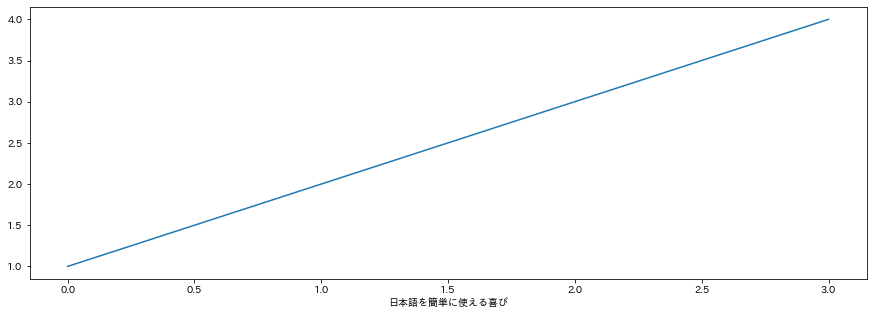

In [28]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(15, 5))
plt.plot([1, 2, 3, 4])
plt.xlabel('日本語を簡単に使える喜び')
plt.show()